# 1 数据处理

## 1.1 数据读取

In [1]:
#导入pandas包，并赋值给变量pd         
import pandas as pd    
#读取GPS数据文件    
data = pd.read_csv('data/TaxiData-Sample.csv')       
#查看数据：最后一行写上变量名    
data 

,34745,20:27:43,113.806847,22.623249,1,27
0,34745,20:24:07,113.809898,22.627399,0,0
1,34745,20:24:27,113.809898,22.627399,0,0
2,34745,20:22:07,113.811348,22.628067,0,0
3,34745,20:10:06,113.819885,22.647800,0,54
4,34745,19:59:48,113.820213,22.674967,0,23
...,...,...,...,...,...,...
544993,28265,21:35:13,114.321503,22.709499,0,18
544994,28265,09:08:02,114.322701,22.681700,0,0
544995,28265,09:14:31,114.336700,22.690100,0,0
544996,28265,21:19:12,114.352600,22.728399,0,0


In [2]:
#读取数据，传入参数header    
data = pd.read_csv('data/TaxiData-Sample.csv',header = None)     
#通过head方法查看数据的前5行    
data.head(5)   

,0,1,2,3,4,5
0,34745,20:27:43,113.806847,22.623249,1,27
1,34745,20:24:07,113.809898,22.627399,0,0
2,34745,20:24:27,113.809898,22.627399,0,0
3,34745,20:22:07,113.811348,22.628067,0,0
4,34745,20:10:06,113.819885,22.647800,0,54


In [3]:
#更改数据的列名    
data.columns = ['VehicleNum','Stime','Lng','Lat','OpenStatus','Speed']      
#查看数据的前5行      
data.head(5) 

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
0,34745,20:27:43,113.806847,22.623249,1,27
1,34745,20:24:07,113.809898,22.627399,0,0
2,34745,20:24:27,113.809898,22.627399,0,0
3,34745,20:22:07,113.811348,22.628067,0,0
4,34745,20:10:06,113.819885,22.647800,0,54


## 1.2 数据清洗

In [4]:
# 查看数据基本情况和缺失值情况
data.info()

print('---------------------------------')

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544999 entries, 0 to 544998
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   VehicleNum  544999 non-null  int64  
 1   Stime       544999 non-null  object 
 2   Lng         544999 non-null  float64
 3   Lat         544999 non-null  float64
 4   OpenStatus  544999 non-null  int64  
 5   Speed       544999 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 24.9+ MB
---------------------------------


VehicleNum    0
Stime         0
Lng           0
Lat           0
OpenStatus    0
Speed         0
dtype: int64

In [5]:
# 数据排序
data = data.sort_values(by = ['VehicleNum','Stime'])
data

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
20280,22396,00:00:29,113.996719,22.693333,1,20
19577,22396,00:01:01,113.995514,22.695032,1,34
19985,22396,00:01:09,113.995430,22.695766,1,41
19153,22396,00:01:41,113.995369,22.696484,1,0
19986,22396,00:02:21,113.995430,22.696650,1,17
...,...,...,...,...,...,...
177680,36805,23:53:21,114.120354,22.544300,1,0
182105,36805,23:53:27,114.120354,22.544300,1,0
178293,36805,23:53:33,114.120354,22.544300,1,0
177982,36805,23:53:36,114.120354,22.544300,0,0


In [6]:
#将OpenStatus列整体下移一行，赋值给OpenStatus1列  
data['OpenStatus1'] = data['OpenStatus'].shift()
#将OpenStatus列整体上移一行，赋值给OpenStatus2列  
data['OpenStatus2'] = data['OpenStatus'].shift(-1)
data

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed,OpenStatus1,OpenStatus2
20280,22396,00:00:29,113.996719,22.693333,1,20,NaN,1.0
19577,22396,00:01:01,113.995514,22.695032,1,34,1.0,1.0
19985,22396,00:01:09,113.995430,22.695766,1,41,1.0,1.0
19153,22396,00:01:41,113.995369,22.696484,1,0,1.0,1.0
19986,22396,00:02:21,113.995430,22.696650,1,17,1.0,0.0
...,...,...,...,...,...,...,...,...
177680,36805,23:53:21,114.120354,22.544300,1,0,1.0,1.0
182105,36805,23:53:27,114.120354,22.544300,1,0,1.0,1.0
178293,36805,23:53:33,114.120354,22.544300,1,0,1.0,0.0
177982,36805,23:53:36,114.120354,22.544300,0,0,1.0,0.0


In [7]:
#将VehicleNum列整体下移一行，赋值给VehicleNum1列 
data['VehicleNum1'] = data['VehicleNum'].shift()
#将VehicleNum列整体下移一行，赋值给VehicleNum2列
data['VehicleNum2'] = data['VehicleNum'].shift(-1)
#剔除异常数据
data = data[-((data['OpenStatus'] != data['OpenStatus1'])& #条件一
(data['OpenStatus'] != data['OpenStatus2'])& #条件二
(data['VehicleNum'] == data['VehicleNum1'])& #条件三
(data['VehicleNum'] == data['VehicleNum2']))] #条件四
#删除辅助判断的列
data = data.drop(['OpenStatus1','OpenStatus2','VehicleNum1','VehicleNum2'],axis = 1)
data

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
20280,22396,00:00:29,113.996719,22.693333,1,20
19577,22396,00:01:01,113.995514,22.695032,1,34
19985,22396,00:01:09,113.995430,22.695766,1,41
19153,22396,00:01:41,113.995369,22.696484,1,0
19986,22396,00:02:21,113.995430,22.696650,1,17
...,...,...,...,...,...,...
177680,36805,23:53:21,114.120354,22.544300,1,0
182105,36805,23:53:27,114.120354,22.544300,1,0
178293,36805,23:53:33,114.120354,22.544300,1,0
177982,36805,23:53:36,114.120354,22.544300,0,0


In [8]:
#结果保存
#保存数据到指定路径，index关键字决定是否保存行名  
data.to_csv('data/TaxiData-Clean.csv',index = None,encoding = 'utf-8_sig')

# 2 数据完整性评估
## 2.1 数据时间完整性评估

In [9]:
# pd.to_datetime(data['Stime'])  # 转化为日期格式 
# data['Hour'] = pd.to_datetime(data['Stime']).dt.hour # 提取小时列
data['Hour']= data['Stime'].str.slice(0,2)  
data

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed,Hour
20280,22396,00:00:29,113.996719,22.693333,1,20,00
19577,22396,00:01:01,113.995514,22.695032,1,34,00
19985,22396,00:01:09,113.995430,22.695766,1,41,00
19153,22396,00:01:41,113.995369,22.696484,1,0,00
19986,22396,00:02:21,113.995430,22.696650,1,17,00
...,...,...,...,...,...,...,...
177680,36805,23:53:21,114.120354,22.544300,1,0,23
182105,36805,23:53:27,114.120354,22.544300,1,0,23
178293,36805,23:53:33,114.120354,22.544300,1,0,23
177982,36805,23:53:36,114.120354,22.544300,0,0,23


In [10]:
#分组并统计各组数量  
Hourcount = data.groupby('Hour')['VehicleNum'].count()    
#更改Series的列名，并将通过reset_index将Series变成DataFrame
Hourcount = Hourcount.rename('count').reset_index() 
Hourcount

,Hour,count
0,00,23701
1,01,22312
2,02,21235
3,03,20019
4,04,19682
5,05,20068
6,06,19533
7,07,22388
8,08,23789
9,09,22001


由于柱状图和折线图能够清晰地展示数据在小时维度分布情况。故后续使用柱状图和折线图进行分析。

接下来，可视化以查看的Hour分布情况。

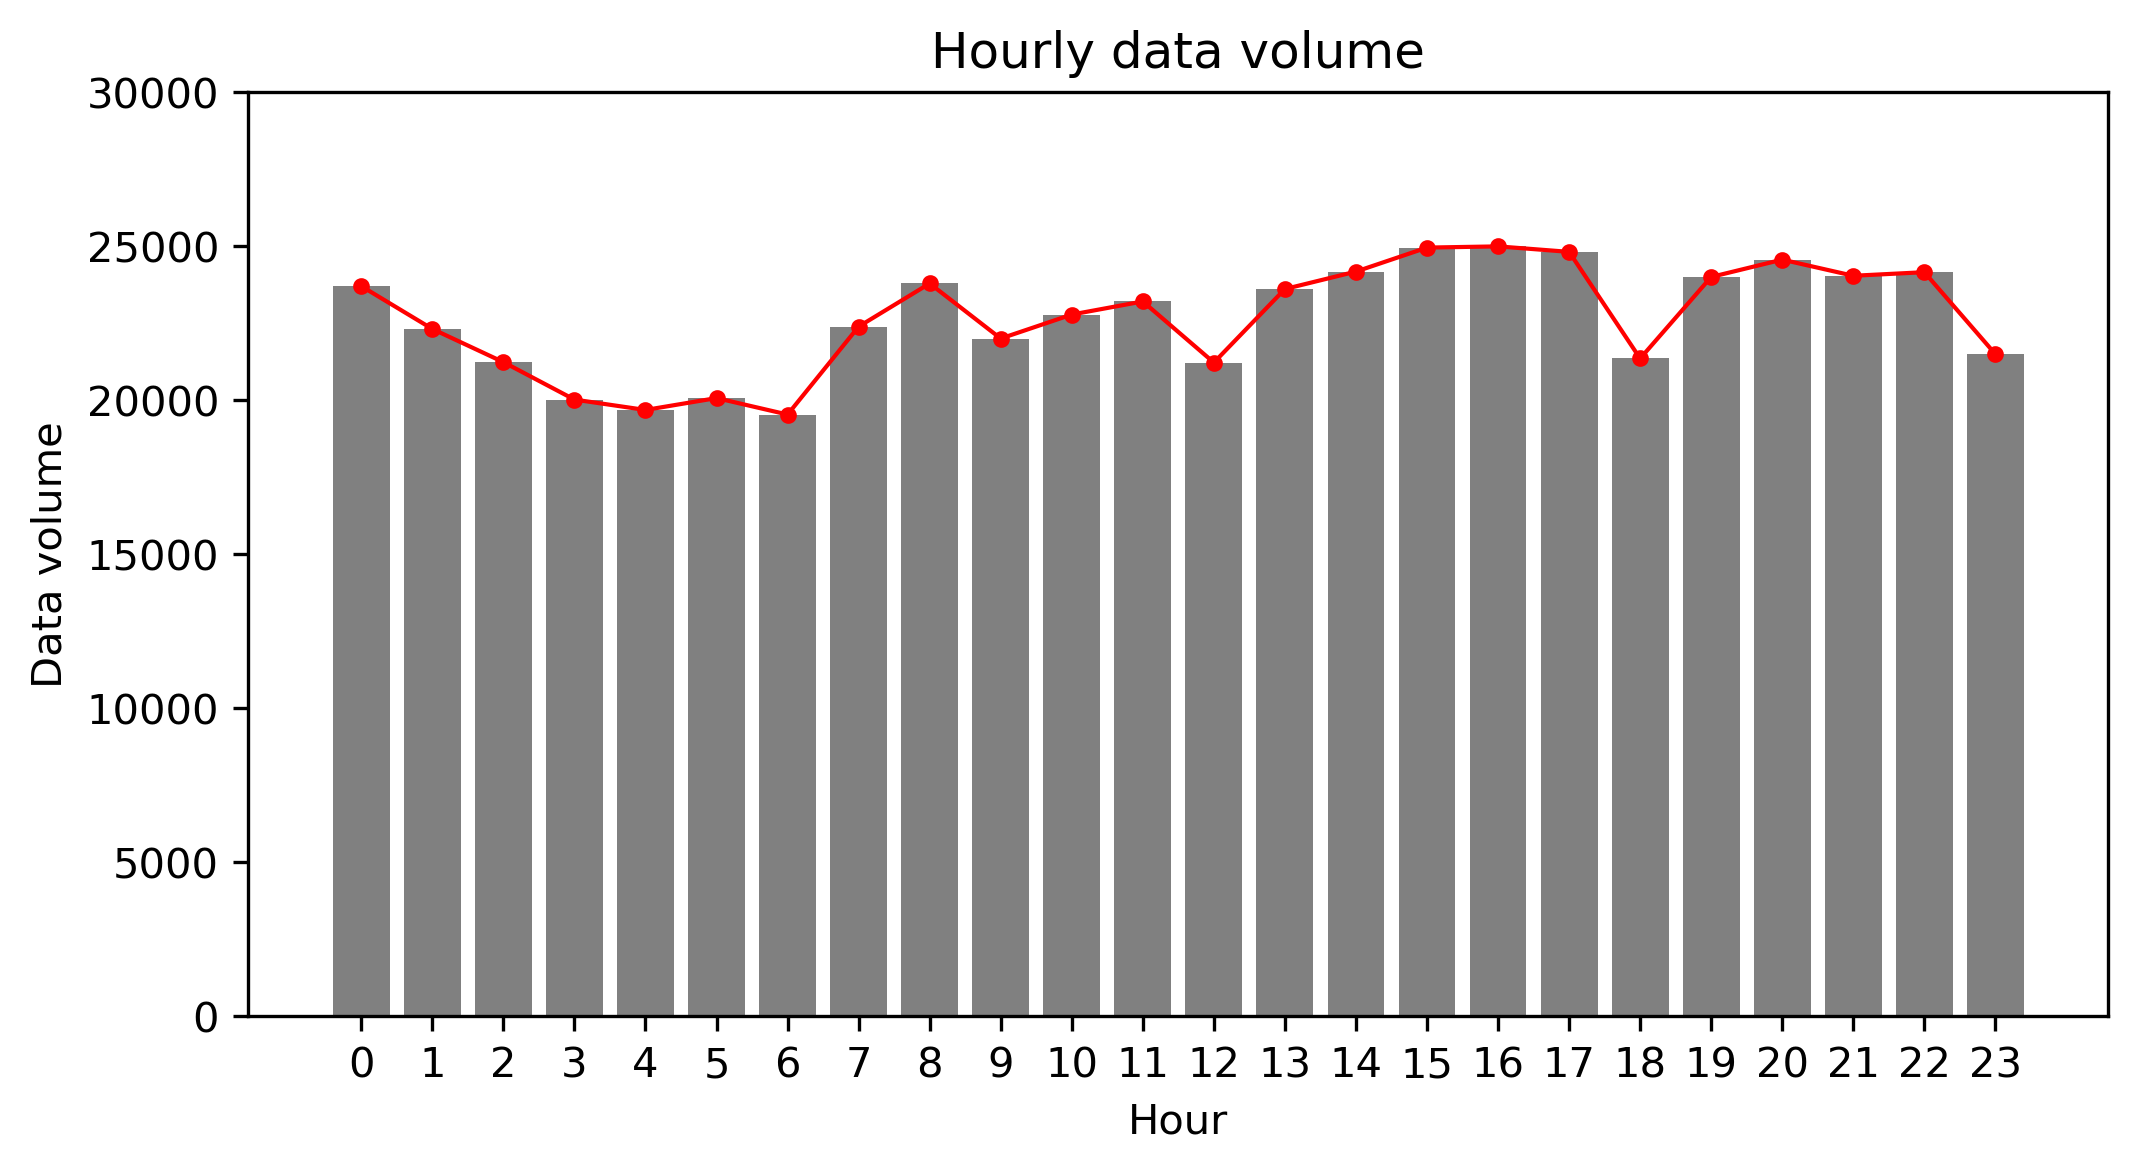

In [11]:
#1.创建图表 
#导入包  
import matplotlib.pyplot as plt  
#创建一个图,图的尺寸为8×4,dpi为300  
fig = plt.figure(1,(8,4),dpi = 300)  
#在图中创建子图  
#111分别表示：创建共一个子图，子图的布局为1行1列  
ax = plt.subplot(111)  
  
#2. 图像绘制 
#绘制折线图
plt.plot(Hourcount['Hour'],Hourcount['count'],'o-r',lw=1,ms=3)   
#绘制柱状图  
plt.bar(Hourcount['Hour'],Hourcount['count'],color='grey')  
  
#3.调整图中元素  
#加y轴标题  
plt.ylabel('Data volume')
#加x轴标题  
plt.xlabel('Hour')
#调整x轴标签
plt.xticks(range(24),range(24))
#加图标题  
plt.title('Hourly data volume')  
#设置y轴范围  
plt.ylim(0,30000)  
#显示图  
plt.show()  

## 2.2 数据空间完整性评估

### 2.2.1 研究区域栅格生成

<Axes: >

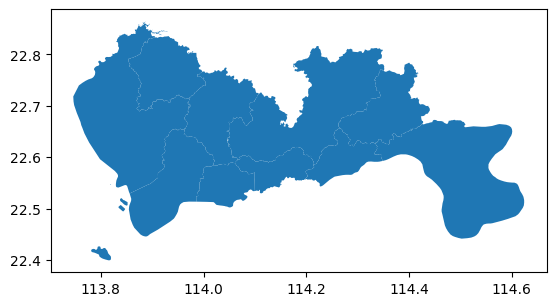

In [12]:
#导入geopandas
import geopandas as gpd 
#读取shp格式地理数据文件  
sz = gpd.GeoDataFrame.from_file(r'data/sz/sz.shp',encoding = 'utf8')  
#绘制地里数据文件
sz.plot()

In [13]:
sz

,centroid_x,centroid_y,qh,geometry
0,114.143157,22.577605,罗湖,"POLYGON ((114.10006 22.53431, 114.09969 22.535..."
1,114.041535,22.546180,福田,"POLYGON ((113.98578 22.51348, 113.98558 22.523..."
2,114.270206,22.596432,盐田,"POLYGON ((114.22772 22.54290, 114.22643 22.543..."
3,113.851387,22.679120,宝安,"MULTIPOLYGON (((113.81831 22.54676, 113.81816 ..."
4,113.926290,22.766157,光明,"POLYGON ((113.98587 22.80304, 113.98605 22.802..."
5,114.356936,22.691020,坪山,"POLYGON ((114.42581 22.66510, 114.42470 22.664..."
6,114.029687,22.686910,龙华,"POLYGON ((114.10825 22.72368, 114.10785 22.723..."
7,113.930714,22.544103,南山,"MULTIPOLYGON (((113.81491 22.39929, 113.80914 ..."
8,114.502205,22.571337,大鹏,"POLYGON ((114.33439 22.62610, 114.33450 22.626..."
9,114.206790,22.695694,龙岗,"POLYGON ((114.06646 22.59544, 114.06635 22.595..."


In [14]:
#导入math包  
import math  
#划定栅格划分范围  
lon1 = 113.75194  
lon2 = 114.624187  
lat1 = 22.447837  
lat2 = 22.864748  
#取得左下角的经纬度  
latStart = min(lat1, lat2);  
lonStart = min(lon1, lon2);  
#定义栅格大小，单位为米  
accuracy = 500;  
#计算栅格的经纬度增加量大小▲Lon和▲Lat，地球半径取6371004米  
deltaLon = accuracy * 360 / (2 * math.pi * 6371004 * math.cos((lat1 + lat2) * math.pi / 360));  
deltaLat = accuracy * 360 / (2 * math.pi * 6371004);  
deltaLon,deltaLat  


(0.004872614089207591, 0.004496605206422906)

In [15]:
#定义一个GPS点测试栅格化  
testlon = 114  
testlat = 22.5  
  
#计算该GPS点对应的栅格编号  
LONCOL=divmod(float(testlon) - (lonStart - deltaLon / 2) , deltaLon)[0]  
LATCOL=divmod(float(testlat) - (latStart - deltaLat / 2) , deltaLat)[0]  
  
#计算该GPS点对应的栅格中心点经纬度  
HBLON = LONCOL*deltaLon + lonStart #格子编号*格子宽+起始横坐标=格子中心横坐标  
HBLAT = LATCOL*deltaLat + latStart   
  
LONCOL,LATCOL,HBLON,HBLAT  

(51.0, 12.0, 114.00044331854959, 22.501796262477075)

In [16]:
import geopandas as gpd  
from shapely.geometry import Polygon  
#定义空的GeoDataFrame表，再往里加栅格  
data = gpd.GeoDataFrame()  
#定义空的list，后面循环一次就往里面加东西  
LONCOL_list = []  
LATCOL_list = []  
geometry_list = []  
HBLON_list = []  
HBLAT_list = []  
#计算行列要生成的栅格数量  
#lon方向是lonsnum个栅格  
lonsnum = int((lon2-lon1)/deltaLon)+1  
#lat方向是latsnum个栅格  
latsnum = int((lat2-lat1)/deltaLat)+1  
for i in range(lonsnum):  
    for j in range(latsnum):  
        #第i列，第j行的栅格中心点坐标  
        HBLON = i*deltaLon + lonStart   
        HBLAT = j*deltaLat + latStart  
        #用周围的栅格推算三个顶点的位置
        HBLON_1 = (i+1)*deltaLon + lonStart  
        HBLAT_1 = (j+1)*deltaLat + latStart  
        #生成栅格的Polygon形状  
        grid_ij = Polygon([  
        (HBLON-deltaLon/2,HBLAT-deltaLat/2),  
        (HBLON_1-deltaLon/2,HBLAT-deltaLat/2),  
        (HBLON_1-deltaLon/2,HBLAT_1-deltaLat/2),  
        (HBLON-deltaLon/2,HBLAT_1-deltaLat/2)]) 
        #把生成的数据都加入到前面定义的空list里面  
        LONCOL_list.append(i)  
        LATCOL_list.append(j)  
        HBLON_list.append(HBLON)  
        HBLAT_list.append(HBLAT)  
        geometry_list.append(grid_ij)  
#为geopandas文件的每一列赋值为刚刚的list  
data['LONCOL'] = LONCOL_list  
data['LATCOL'] = LATCOL_list  
data['HBLON'] = HBLON_list  
data['HBLAT'] = HBLAT_list  
# data['geometry'] = geometry_list  
data.set_geometry(geometry_list, inplace=True)
data  

,LONCOL,LATCOL,HBLON,HBLAT,geometry
0,0,0,113.751940,22.447837,"POLYGON ((113.74950 22.44559, 113.75438 22.445..."
1,0,1,113.751940,22.452334,"POLYGON ((113.74950 22.45009, 113.75438 22.450..."
2,0,2,113.751940,22.456830,"POLYGON ((113.74950 22.45458, 113.75438 22.454..."
3,0,3,113.751940,22.461327,"POLYGON ((113.74950 22.45908, 113.75438 22.459..."
4,0,4,113.751940,22.465823,"POLYGON ((113.74950 22.46358, 113.75438 22.463..."
...,...,...,...,...,...
16735,179,88,114.624138,22.843538,"POLYGON ((114.62170 22.84129, 114.62657 22.841..."
16736,179,89,114.624138,22.848035,"POLYGON ((114.62170 22.84579, 114.62657 22.845..."
16737,179,90,114.624138,22.852531,"POLYGON ((114.62170 22.85028, 114.62657 22.850..."
16738,179,91,114.624138,22.857028,"POLYGON ((114.62170 22.85478, 114.62657 22.854..."


<Axes: >

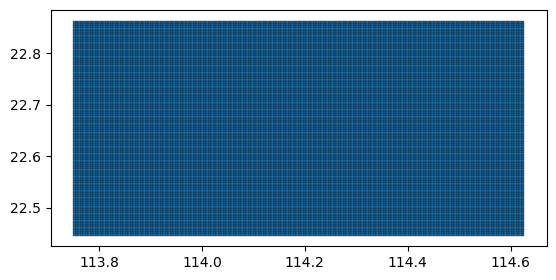

In [17]:
data.plot(edgecolor = (0,0,0,1),linewidth = 0.2)  

<Axes: >

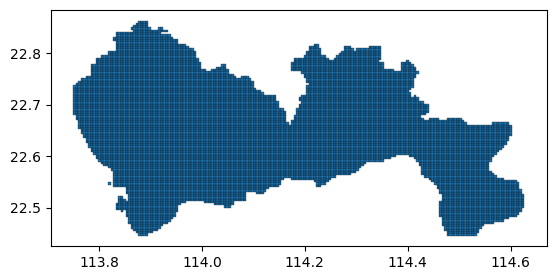

In [18]:
#将前面读取的GeoDataFrame用unary_union方法合并为一个Polygon图形作为研究范围  
roi = sz.unary_union  
#筛选出研究范围的栅格  
grid_sz = data[data.intersects(roi)]  
grid_sz.plot(edgecolor = (0,0,0,1),linewidth = 0.2)  

In [19]:
grid_sz.to_file(r'data/grid_sz.json', driver = 'GeoJSON')

### 2.2.2 GPS数据的栅格对应与集计

In [20]:
#读取数据    
data = pd.read_csv('data/TaxiData-Sample.csv',header = None)        
data.columns = ['VehicleNum','Stime','Lng','Lat','OpenStatus','Speed']      
#数据对应的栅格经纬度编号  
data['LONCOL'] = ((data['Lng'] - (lonStart - deltaLon / 2))/deltaLon).astype('int')  
data['LATCOL'] = ((data['Lat'] - (latStart - deltaLat / 2))/deltaLat).astype('int')   
#集计栅格数据量
data_distribution = data.groupby(['LONCOL','LATCOL'])['VehicleNum'].count().rename('count').reset_index()
#剔除不在研究范围内的OD记录  
data_distribution = data_distribution[(data_distribution['LONCOL']>=0)&(data_distribution['LATCOL']>=0)&
                (data_distribution['LONCOL']<=lonsnum)&(data_distribution['LATCOL']<=latsnum)] 
data_distribution

,LONCOL,LATCOL,count
188,0,77,1
189,0,78,7
190,0,81,4
192,1,77,3
193,1,78,1
...,...,...,...
3968,160,89,2
3969,162,91,2
3970,163,92,1
3971,164,93,2


### 2.2.3 统计结果与栅格地理信息的连接

In [21]:
#将栅格数据与统计数据进行表连接，在栅格数据上加上数据量
grid_count = pd.merge(grid_sz,data_distribution,on = ['LONCOL','LATCOL'])
grid_count

,LONCOL,LATCOL,HBLON,HBLAT,geometry,count
0,5,52,113.776303,22.681660,"POLYGON ((113.77387 22.67941, 113.77874 22.679...",6
1,5,53,113.776303,22.686157,"POLYGON ((113.77387 22.68391, 113.77874 22.683...",3
2,5,54,113.776303,22.690654,"POLYGON ((113.77387 22.68841, 113.77874 22.688...",1
3,5,55,113.776303,22.695150,"POLYGON ((113.77387 22.69290, 113.77874 22.692...",1
4,5,56,113.776303,22.699647,"POLYGON ((113.77387 22.69740, 113.77874 22.697...",6
...,...,...,...,...,...,...
3397,151,33,114.487705,22.596225,"POLYGON ((114.48527 22.59398, 114.49014 22.593...",2
3398,152,33,114.492577,22.596225,"POLYGON ((114.49014 22.59398, 114.49501 22.593...",1
3399,153,34,114.497450,22.600722,"POLYGON ((114.49501 22.59847, 114.49989 22.598...",2
3400,154,33,114.502323,22.596225,"POLYGON ((114.49989 22.59398, 114.50476 22.593...",1


In [22]:
grid_count.to_file(r'data/grid_count.json',driver = 'GeoJSON')

### 2.2.4 统计结果与栅格地理信息的连接

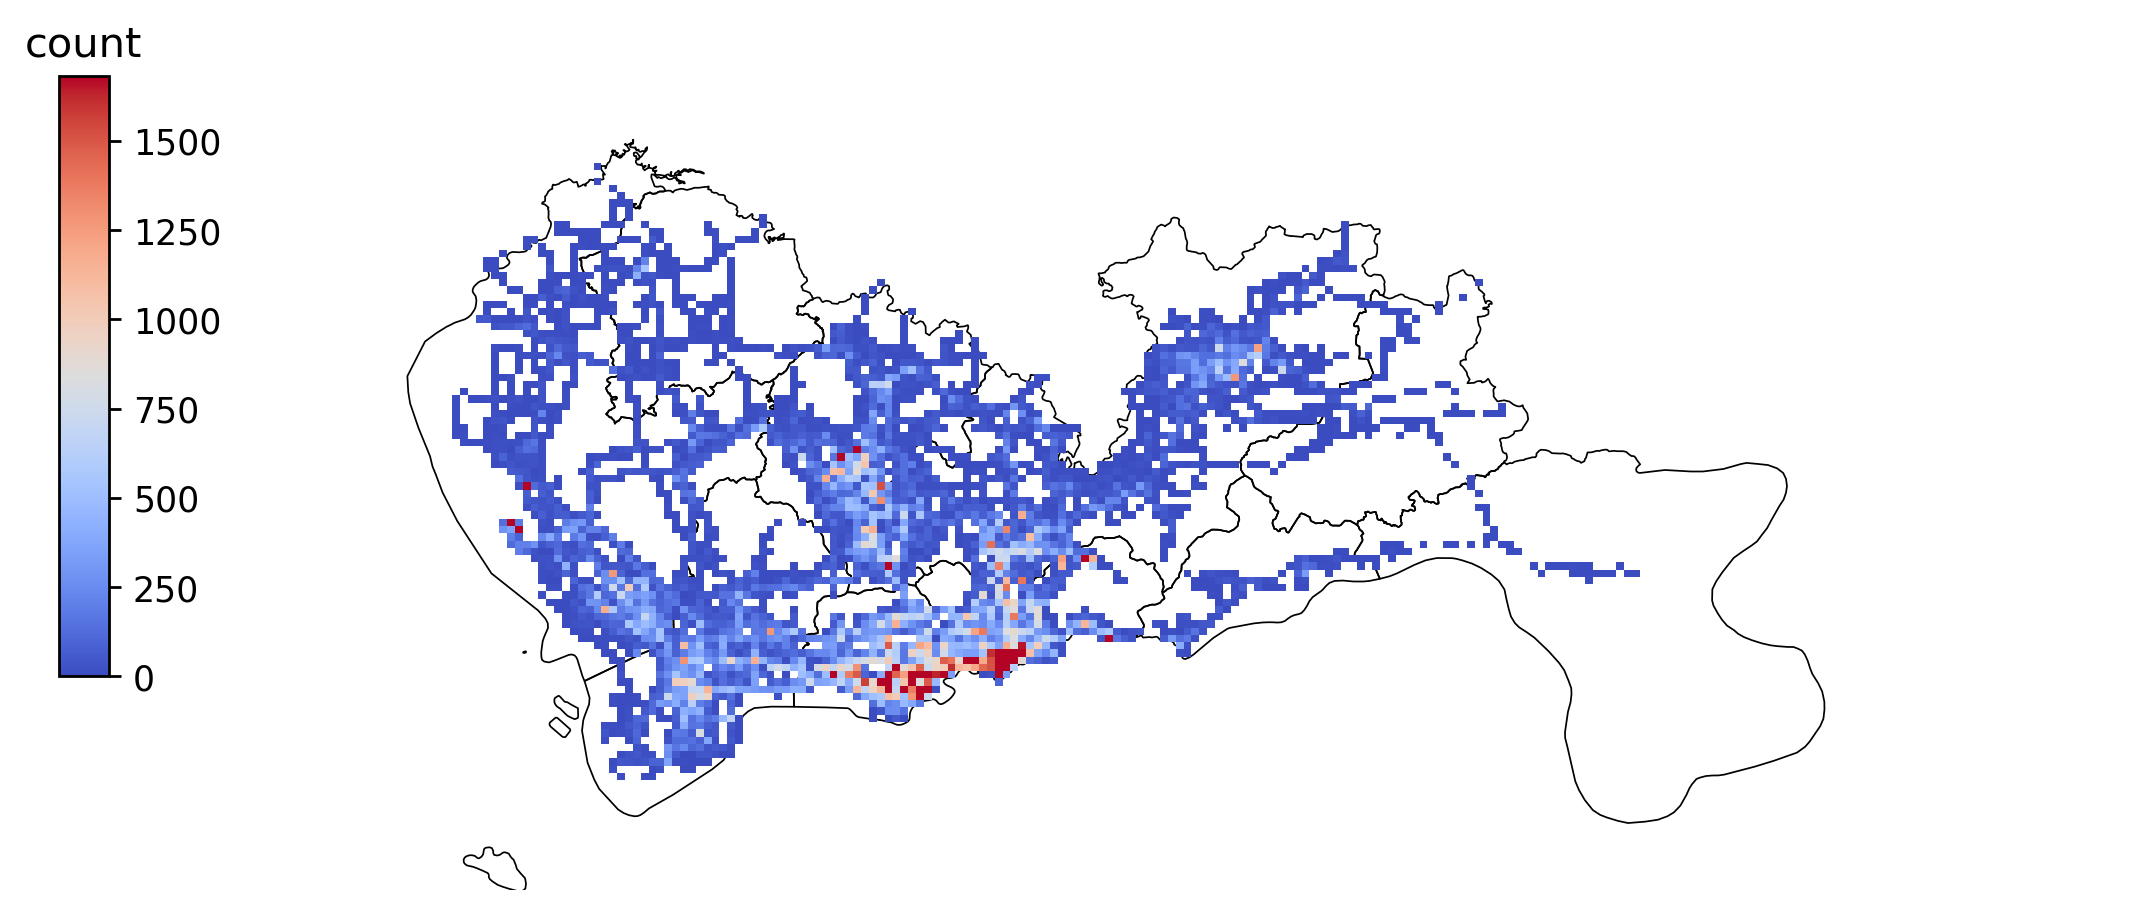

In [23]:
#绘制
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,8),dpi = 250)    
ax = plt.subplot(111)

#绘制行政区划的边界
sz.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

#设置colormap与colorbar
import matplotlib
#设置99%分位数为colorbar最大值
vmax = grid_count['count'].quantile(0.99)
#换一种内置颜色
cmapname = 'coolwarm'
cmap = matplotlib.colormaps.get_cmap(cmapname)
cax = plt.axes([0.08, 0.4, 0.02, 0.3])
plt.title('count')
plt.sca(ax)

#绘制栅格
grid_count.plot(ax = ax,column = 'count',linewidth = 0,
                vmin = 0,vmax = vmax,cmap = cmap,
                legend=True,cax = cax) 

plt.axis('off')
plt.xlim(113.6,114.8)
plt.ylim(22.4,22.9)
plt.show()

### 2.2.5 出租车GPS数据分布的散点图

In [24]:
#经纬度小数点保留三位小数  
data2 = data[['Lng','Lat']].round(3).copy()  

#集计每个小范围内数据量  
data2['count'] = 1  
data2 = data2.groupby(['Lng','Lat'])['count'].count().reset_index()  

#排序数据，让数据量小的放上面先画，数据大的放下面最后画  
data2 = data2.sort_values(by = 'count')  
data2

,Lng,Lat,count
0,108.002,10.280,1
19906,114.123,22.640,1
19911,114.123,22.665,1
5439,113.913,22.483,1
5438,113.912,22.906,1
...,...,...,...
22188,114.180,22.556,1466
11185,114.013,22.668,1495
912,113.819,22.650,1558
10735,114.008,22.535,1916


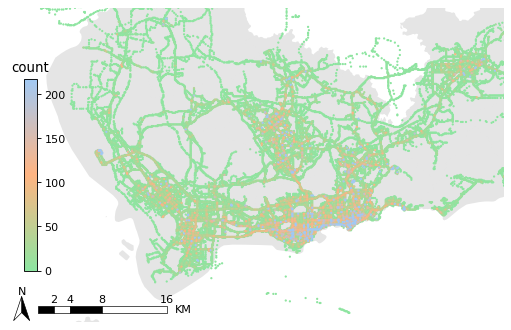

In [25]:
#创建图框
import seaborn as sns
import matplotlib as mpl  
import matplotlib.pyplot as plt  
import transbigdata as tbd 
fig     = plt.figure(1,(8,8),dpi = 80)      
ax      = plt.subplot(111)  
plt.sca(ax)      
#绘制行政区划的边界
bounds = [113.7, 22.42, 114.3, 22.8]  
sz.plot(ax = ax,edgecolor = (0,0,0,0),facecolor = (0,0,0,0.1),linewidths=0.5)
#定义colorbar  
pallete_name = "pastel"  
colors = sns.color_palette(pallete_name, 3)  
colors.reverse()  
cmap = mpl.colors.LinearSegmentedColormap.from_list(pallete_name, colors)  
vmax = data2['count'].quantile(0.99)  
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)  
#绘制散点图 
plt.scatter(data2['Lng'],data2['Lat'],s = 1,alpha = 1,c = data2['count'],cmap = cmap,norm=norm )  
#添加比例尺和指北针  
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03])  
plt.axis('off')  
plt.xlim(bounds[0],bounds[2])  
plt.ylim(bounds[1],bounds[3])  
#绘制colorbar    
cax = plt.axes([0.15, 0.33, 0.02, 0.3])  
plt.colorbar(cax=cax)  
plt.title('count')
plt.show()  

### 2.2.6 出租车GPS数据分布的等高线图

In [26]:
import numpy as np  
#转换数据透视表，变成矩阵格式
d = data2.pivot(columns = 'Lng',index = 'Lat',values = 'count').fillna(0)  
#取对数，缩小最大最小值之间的差距
z = np.log(d.values)
x = d.columns  
y = d.index  
#划分层数  
levels = np.linspace(0, z.max(), 25)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10816\1450427118.py:5: RuntimeWarning: divide by zero encountered in log
  z = np.log(d.values)


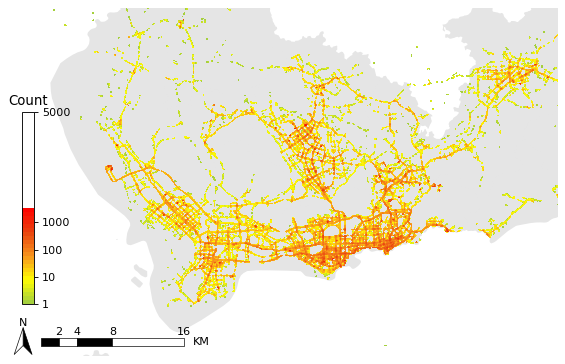

In [27]:
#导入绘图包  
import matplotlib as mpl  
import matplotlib.pyplot as plt  
import transbigdata as tbd
fig     = plt.figure(1,(8,8),dpi = 80)      
ax      = plt.subplot(111)  
plt.sca(ax)  
fig.tight_layout(rect = (0.05,0.1,1,0.9))#调整整体空白  
#绘制行政区划的边界
bounds = [113.7, 22.42, 114.3, 22.8]  
sz.plot(ax = ax,edgecolor = (0,0,0,0),facecolor = (0,0,0,0.1),linewidths=0.5)
#定义colorbar  
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('cmap', ['#9DCC42','#FFFE03','#F7941D','#E9420E','#FF0000'], 256)
#绘制等高线图  
plt.contourf(x,y,z, levels=levels, cmap=cmap,origin = 'lower') 
#添加比例尺和指北针    
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03])    
plt.axis('off')  
plt.xlim(bounds[0],bounds[2])  
plt.ylim(bounds[1],bounds[3])    
#绘制colorbar  
cax = plt.axes([0.13, 0.32, 0.02, 0.3])  
cbar = plt.colorbar(cax=cax)  
#调整colorbar的显示标记位置
val = [1,10,100,1000,5000]
pos = np.log(np.array(val))
#在什么位置显示标记
cbar.set_ticks(pos)
#标记显示什么内容
cbar.set_ticklabels(val)
plt.title('Count')
plt.show()  

### 2.2.7 出租车GPS数据分布的二维核密度图

In [28]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

<Axes: xlabel='Lng', ylabel='Lat'>

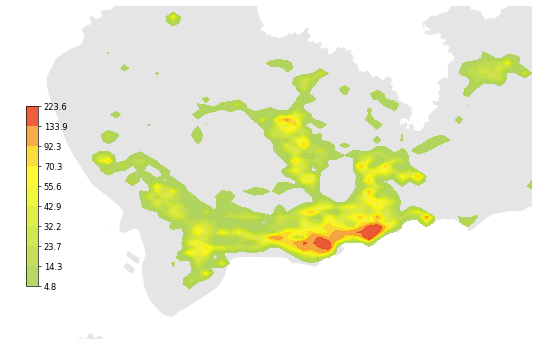

In [29]:
#导入绘图包
import matplotlib as mpl
import matplotlib.pyplot as plt
import transbigdata as tbd
import seaborn as sns
import numpy as np
fig     = plt.figure(1,(10,10),dpi = 60)    
ax      = plt.subplot(111)
plt.sca(ax)
fig.tight_layout(rect = (0.05,0.1,1,0.9))#调整整体空白
#绘制行政区划的边界
bounds = [113.7, 22.42, 114.3, 22.8]  
sz.plot(ax = ax,edgecolor = (0,0,0,0),facecolor = (0,0,0,0.1),linewidths=0.5)
#colorbar的数据
cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#9DCC42','#FFFE03','#F7941D','#E9420E','#FF0000'], 256)
#设定位置
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
#定义colorbar位置
cax = plt.axes([0.13, 0.32, 0.02, 0.3])
#绘制二维核密度图
sns.kdeplot(
    data = data2[data2['count']>10],#传入数据，筛选去除太小的值
    x='Lng',y='Lat',#指定x与y坐标所在的列
    weights = 'count', #设定权重所在字段
    alpha = 0.8, #透明度
    gridsize = 120, #绘图精细度，越高越慢
    bw_method = 0.03,    #高斯核大小（经纬度），越小越精细
    cmap = cmap, #定义colormap
    ax = ax, #指定绘图位置
    fill=True, #等高线间是否填充颜色
    cbar=True, #显示colorbar
    cbar_ax=cax #指定colorbar位置
           )

# 3 出租车订单出行特征分析
## 3.1 出租车出行订单数据加载

In [30]:
#导入pandas包，并赋值给变量pd         
import pandas as pd    
#读取GPS数据文件    
data = pd.read_csv('data/TaxiData-clean.csv')    

#构建StatusChange列
data['StatusChange'] = data['OpenStatus'] - data['OpenStatus'].shift()
#筛选出行开始和结束信息  
oddata = data[((data['StatusChange'] == -1)|  
               (data['StatusChange'] == 1))&    
               (data['VehicleNum'].shift() == data['VehicleNum'])]  
#删去无用的列  
oddata = oddata.drop(['OpenStatus','Speed'],axis = 1)   
oddata  

,VehicleNum,Stime,Lng,Lat,StatusChange
5,22396,00:03:01,113.994934,22.697884,-1.0
33,22396,00:19:41,114.013016,22.664818,1.0
38,22396,00:23:01,114.021400,22.663918,-1.0
73,22396,00:41:51,114.021767,22.640200,1.0
75,22396,00:43:44,114.026070,22.640266,-1.0
...,...,...,...,...,...
543866,36805,23:20:09,114.133286,22.617750,-1.0
543928,36805,23:36:19,114.112968,22.549601,1.0
543995,36805,23:43:12,114.089485,22.538918,-1.0
544008,36805,23:46:14,114.091217,22.540768,1.0


In [31]:
#首先给oddata更改列名  
oddata.columns = ['VehicleNum', 'Stime', 'SLng', 'SLat', 'StatusChange']  
#把一个订单的两行数据整理成一行  
oddata['Etime'] = oddata['Stime'].shift(-1)  
oddata['ELng'] = oddata['SLng'].shift(-1)  
oddata['ELat'] = oddata['SLat'].shift(-1)  
#筛选正确的订单OD数据：StatusChange == 1；shift后的数据属于同一个出租车  
oddata = oddata[(oddata['StatusChange'] == 1)&  
                  (oddata['VehicleNum'] == oddata['VehicleNum'].shift(-1))]  
#去掉StatusChange列
oddata = oddata.drop('StatusChange',axis = 1)  
oddata   

,VehicleNum,Stime,SLng,SLat,Etime,ELng,ELat
33,22396,00:19:41,114.013016,22.664818,00:23:01,114.021400,22.663918
73,22396,00:41:51,114.021767,22.640200,00:43:44,114.026070,22.640266
78,22396,00:45:44,114.028099,22.645082,00:47:44,114.030380,22.650017
114,22396,01:08:26,114.034897,22.616301,01:16:34,114.035614,22.646717
138,22396,01:26:06,114.046021,22.641251,01:34:48,114.066048,22.636183
...,...,...,...,...,...,...,...
543573,36805,22:49:12,114.114365,22.550632,22:50:40,114.115501,22.557983
543590,36805,22:52:07,114.115402,22.558083,23:03:12,114.118484,22.547867
543702,36805,23:03:45,114.118484,22.547867,23:20:09,114.133286,22.617750
543928,36805,23:36:19,114.112968,22.549601,23:43:12,114.089485,22.538918


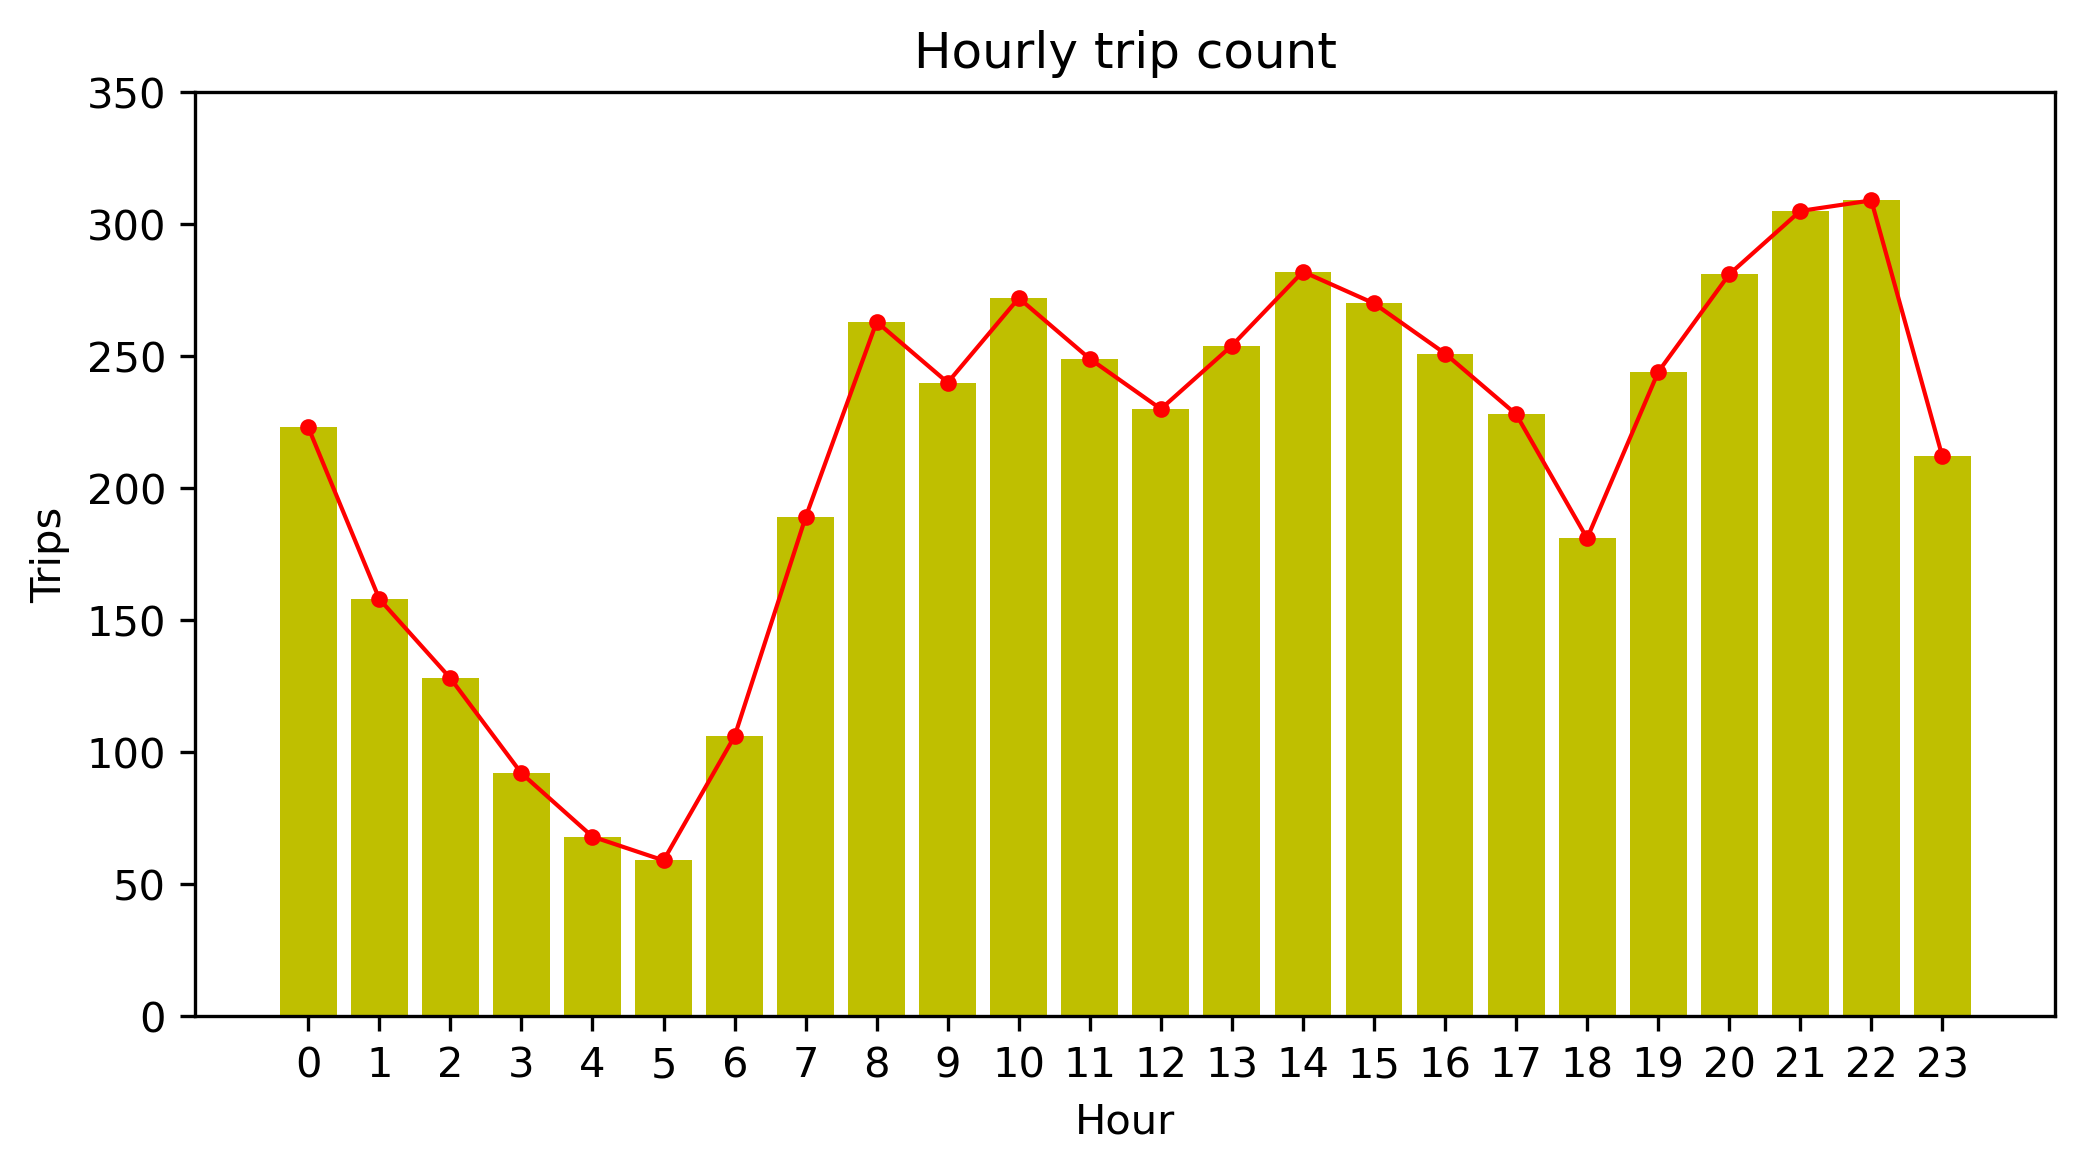

In [32]:
#统计每小时订单数  
oddata['Hour'] = oddata.apply(lambda r:r['Stime'][:2],axis = 1).astype(int) 
Hourcount_od = oddata.groupby('Hour')['VehicleNum'].count()      
Hourcount_od = Hourcount_od.rename('count').reset_index()   
#绘制折线图   
import matplotlib.pyplot as plt   
fig = plt.figure(1,(8,4),dpi = 300)    
ax = plt.subplot(111)    
plt.plot(Hourcount_od['Hour'],Hourcount_od['count'],'o-r',lw =1,ms=3)    
plt.bar(Hourcount_od['Hour'],Hourcount_od['count'],color='y')    
plt.ylabel('Trips')  
plt.xlabel('Hour')  
plt.xticks(range(24),range(24))  
plt.title('Hourly trip count')    
plt.ylim(0,350)    
plt.show()

## 3.2 出行订单持续时间

In [33]:
#1.标准化时间    
#订单开始时间标准化    
oddata['Stime_st'] = oddata['Stime'].apply(lambda r: int(r.split(':')[0]))*3600+oddata['Stime'].apply(lambda r: int(r.split(':')[1]))*60+oddata['Stime'].apply(lambda r: int(r.split(':')[2]))   
#订单结束时间标准化    
oddata['Etime_st'] = oddata['Etime'].apply(lambda r: int(r.split(':')[0]))*3600+oddata['Etime'].apply(lambda r: int(r.split(':')[1]))*60+oddata['Etime'].apply(lambda r: int(r.split(':')[2]))    
#计算时间差    
oddata['duration'] = (oddata['Etime_st'] - oddata['Stime_st'])    
oddata  

,VehicleNum,Stime,SLng,SLat,Etime,ELng,ELat,Hour,Stime_st,Etime_st,duration
33,22396,00:19:41,114.013016,22.664818,00:23:01,114.021400,22.663918,0,1181,1381,200
73,22396,00:41:51,114.021767,22.640200,00:43:44,114.026070,22.640266,0,2511,2624,113
78,22396,00:45:44,114.028099,22.645082,00:47:44,114.030380,22.650017,0,2744,2864,120
114,22396,01:08:26,114.034897,22.616301,01:16:34,114.035614,22.646717,1,4106,4594,488
138,22396,01:26:06,114.046021,22.641251,01:34:48,114.066048,22.636183,1,5166,5688,522
...,...,...,...,...,...,...,...,...,...,...,...
543573,36805,22:49:12,114.114365,22.550632,22:50:40,114.115501,22.557983,22,82152,82240,88
543590,36805,22:52:07,114.115402,22.558083,23:03:12,114.118484,22.547867,22,82327,82992,665
543702,36805,23:03:45,114.118484,22.547867,23:20:09,114.133286,22.617750,23,83025,84009,984
543928,36805,23:36:19,114.112968,22.549601,23:43:12,114.089485,22.538918,23,84979,85392,413


In [34]:
#2.时间格式转换    
oddata['duration'] = pd.to_datetime(oddata['Etime'],format="%H:%M:%S") - pd.to_datetime(oddata['Stime'],format="%H:%M:%S")    
#将时间差转换为秒    
oddata['duration'] = oddata['duration'].apply(lambda r: r.seconds)    
oddata  

,VehicleNum,Stime,SLng,SLat,Etime,ELng,ELat,Hour,Stime_st,Etime_st,duration
33,22396,00:19:41,114.013016,22.664818,00:23:01,114.021400,22.663918,0,1181,1381,200
73,22396,00:41:51,114.021767,22.640200,00:43:44,114.026070,22.640266,0,2511,2624,113
78,22396,00:45:44,114.028099,22.645082,00:47:44,114.030380,22.650017,0,2744,2864,120
114,22396,01:08:26,114.034897,22.616301,01:16:34,114.035614,22.646717,1,4106,4594,488
138,22396,01:26:06,114.046021,22.641251,01:34:48,114.066048,22.636183,1,5166,5688,522
...,...,...,...,...,...,...,...,...,...,...,...
543573,36805,22:49:12,114.114365,22.550632,22:50:40,114.115501,22.557983,22,82152,82240,88
543590,36805,22:52:07,114.115402,22.558083,23:03:12,114.118484,22.547867,22,82327,82992,665
543702,36805,23:03:45,114.118484,22.547867,23:20:09,114.133286,22.617750,23,83025,84009,984
543928,36805,23:36:19,114.112968,22.549601,23:43:12,114.089485,22.538918,23,84979,85392,413


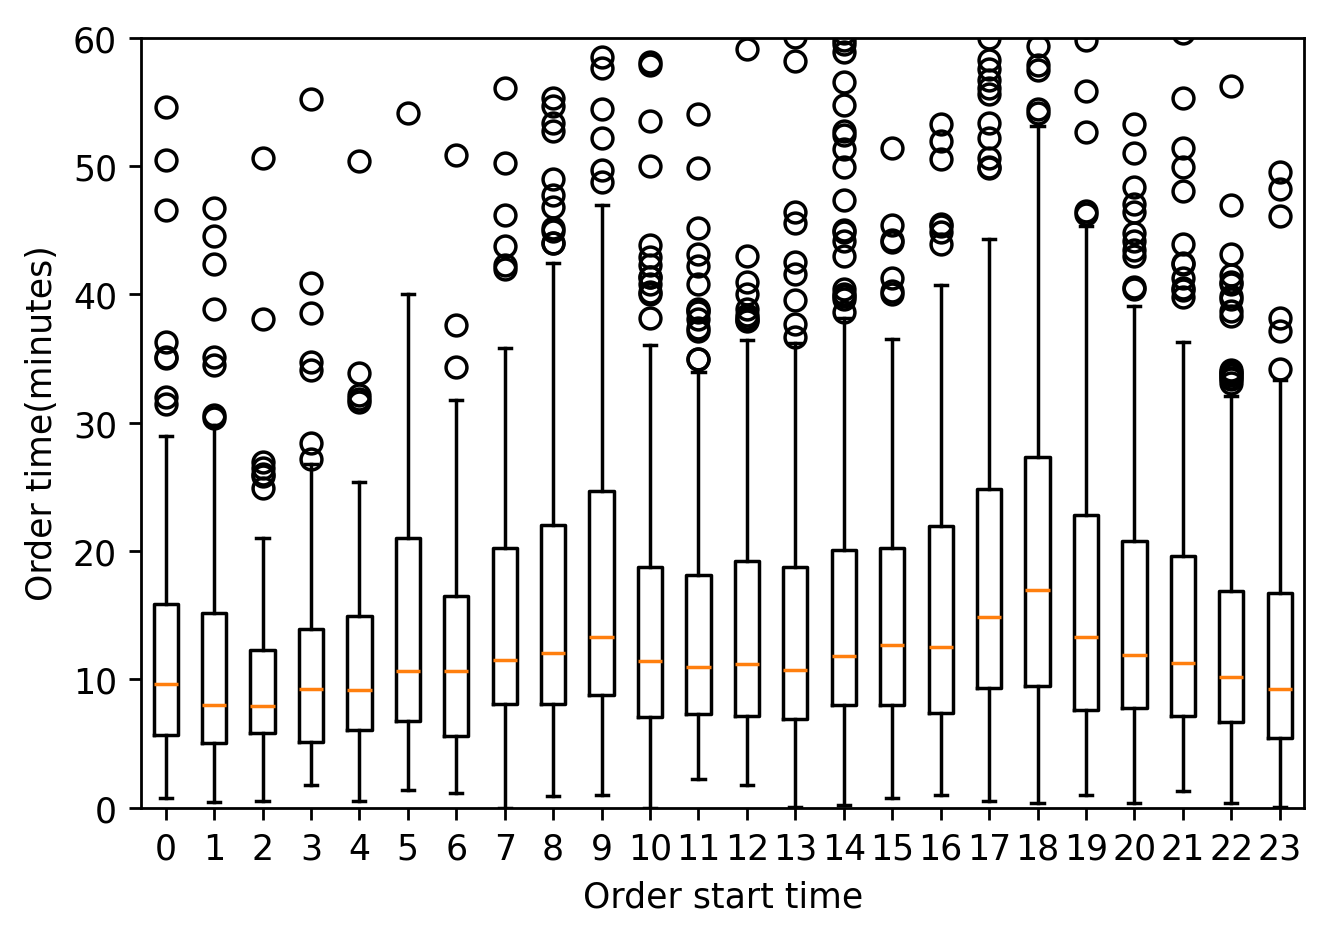

In [35]:
#订单持续时间箱型图的绘制：plt.boxplot  
import matplotlib.pyplot as plt   
fig     = plt.figure(1,(6,4),dpi = 250)       
ax      = plt.subplot(111)  
plt.sca(ax)  
#整理箱型图的数据，循环遍历每个小时，将列数据放入datas变量中  
datas = []  
for hour in range(24):  
    datas.append(oddata[oddata['Hour']==hour]['duration']/60)  
#绘制箱型图  
plt.boxplot(datas)  
#更改x轴ticks的文字,传入两个参数，第一个为位置，第二个为标注文字  
plt.xticks(range(1,25),range(24))  
plt.ylabel('Order time(minutes)')  
plt.xlabel('Order start time')  
plt.ylim(0,60)  
plt.show()  

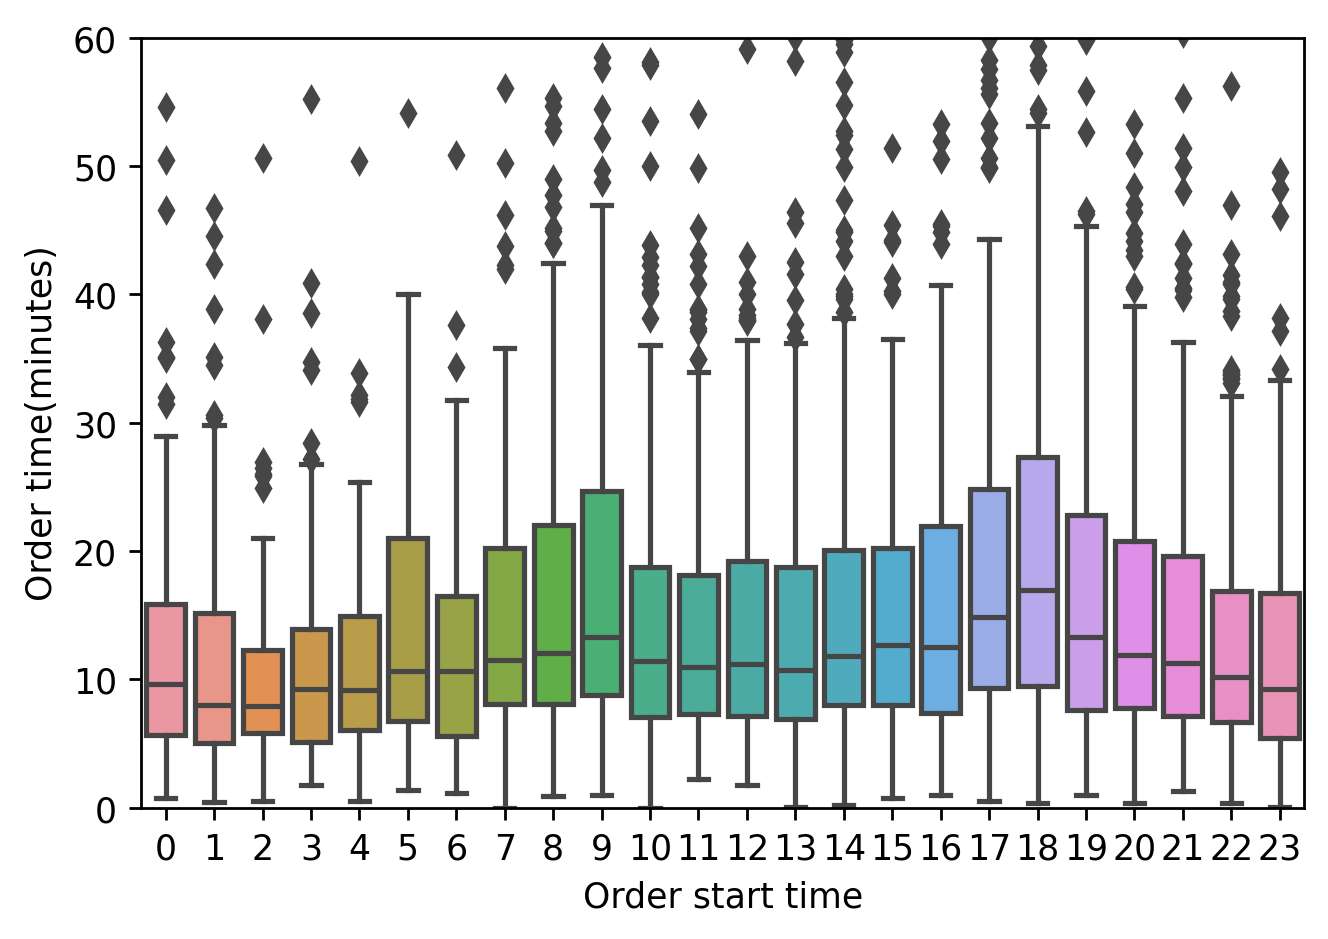

In [36]:
#订单持续时间箱型图的绘制：sns.boxplot  
import matplotlib.pyplot as plt  
import seaborn as sns  
fig     = plt.figure(1,(6,4),dpi = 250)      
ax      = plt.subplot(111)  
plt.sca(ax)  
#只需要一行，指定传入的数据，x轴y轴分别是哪个维度  
sns.boxplot(x="Hour", y=oddata["duration"]/60, data=oddata,ax = ax)  
plt.ylabel('Order time(minutes)')  
plt.xlabel('Order start time')  
plt.ylim(0,60)  
plt.show()  

## 3.3 出租车出行订单栅格可视化

In [37]:
#计算起点对应的栅格经纬度编号    
oddata['SLONCOL'] = ((oddata['SLng'] - (lonStart - deltaLon / 2))/deltaLon).astype('int')    
oddata['SLATCOL'] = ((oddata['SLat'] - (latStart - deltaLat / 2))/deltaLat).astype('int')     
#计算终点对应的栅格经纬度编号    
oddata['ELONCOL'] = ((oddata['ELng'] - (lonStart - deltaLon / 2))/deltaLon).astype('int')    
oddata['ELATCOL'] = ((oddata['ELat'] - (latStart - deltaLat / 2))/deltaLat).astype('int')    
#剔除起终点在一个栅格内的记录    
oddata = oddata[-((oddata['SLONCOL']==oddata['ELONCOL'])&  
                  (oddata['SLATCOL']==oddata['ELATCOL']))]    
#剔除不在研究范围内的OD记录    
oddata = oddata[(oddata['SLONCOL']>=0)&(oddata['SLATCOL']>=0)&  
                (oddata['ELONCOL']>=0)&(oddata['ELATCOL']>=0)&    
                (oddata['SLONCOL']<=lonsnum)&   
                (oddata['SLATCOL']<=latsnum)&  
                (oddata['ELONCOL']<=lonsnum)&  
                (oddata['ELATCOL']<=latsnum)]   
#列数比较多，转置方便查看  
oddata.iloc[:5].T  


,33,73,78,114,138
VehicleNum,22396,22396,22396,22396,22396
Stime,00:19:41,00:41:51,00:45:44,01:08:26,01:26:06
SLng,114.013016,114.021767,114.028099,114.034897,114.046021
SLat,22.664818,22.6402,22.645082,22.616301,22.641251
Etime,00:23:01,00:43:44,00:47:44,01:16:34,01:34:48
ELng,114.0214,114.02607,114.03038,114.035614,114.066048
ELat,22.663918,22.640266,22.650017,22.646717,22.636183
Hour,0,0,0,1,1
Stime_st,1181,2511,2744,4106,5166
Etime_st,1381,2624,2864,4594,5688


In [38]:
#对以起终点栅格编号列为依据集计订单数量  
OD = oddata.groupby(['SLONCOL','SLATCOL','ELONCOL','ELATCOL'])['VehicleNum'].count().rename('count').reset_index()    
#起点栅格中心点经纬度    
OD['SHBLON'] = OD['SLONCOL'] * deltaLon + (lonStart - deltaLon / 2)    
OD['SHBLAT'] = OD['SLATCOL'] * deltaLat + (latStart - deltaLat / 2)    
#终点栅格中心点经纬度    
OD['EHBLON'] = OD['ELONCOL'] * deltaLon + (lonStart - deltaLon / 2)    
OD['EHBLAT'] = OD['ELATCOL'] * deltaLat + (latStart - deltaLat / 2)    
#排序，将count值大的OD排在最下  
OD = OD.sort_values(by = 'count')  
OD  

,SLONCOL,SLATCOL,ELONCOL,ELATCOL,count,SHBLON,SHBLAT,EHBLON,EHBLAT
0,2,78,7,78,1,113.759249,22.796324,113.783612,22.796324
3140,70,21,77,23,1,114.090587,22.540017,114.124695,22.549011
3139,70,21,76,29,1,114.090587,22.540017,114.119822,22.575990
3138,70,21,76,23,1,114.090587,22.540017,114.119822,22.549011
3137,70,21,76,22,1,114.090587,22.540017,114.119822,22.544514
...,...,...,...,...,...,...,...,...,...
3301,72,23,75,21,4,114.100332,22.549011,114.114950,22.540017
3722,75,21,76,21,4,114.114950,22.540017,114.119822,22.540017
1885,59,18,61,20,4,114.036988,22.526528,114.046733,22.535521
2779,65,17,63,17,5,114.066224,22.522031,114.056478,22.522031


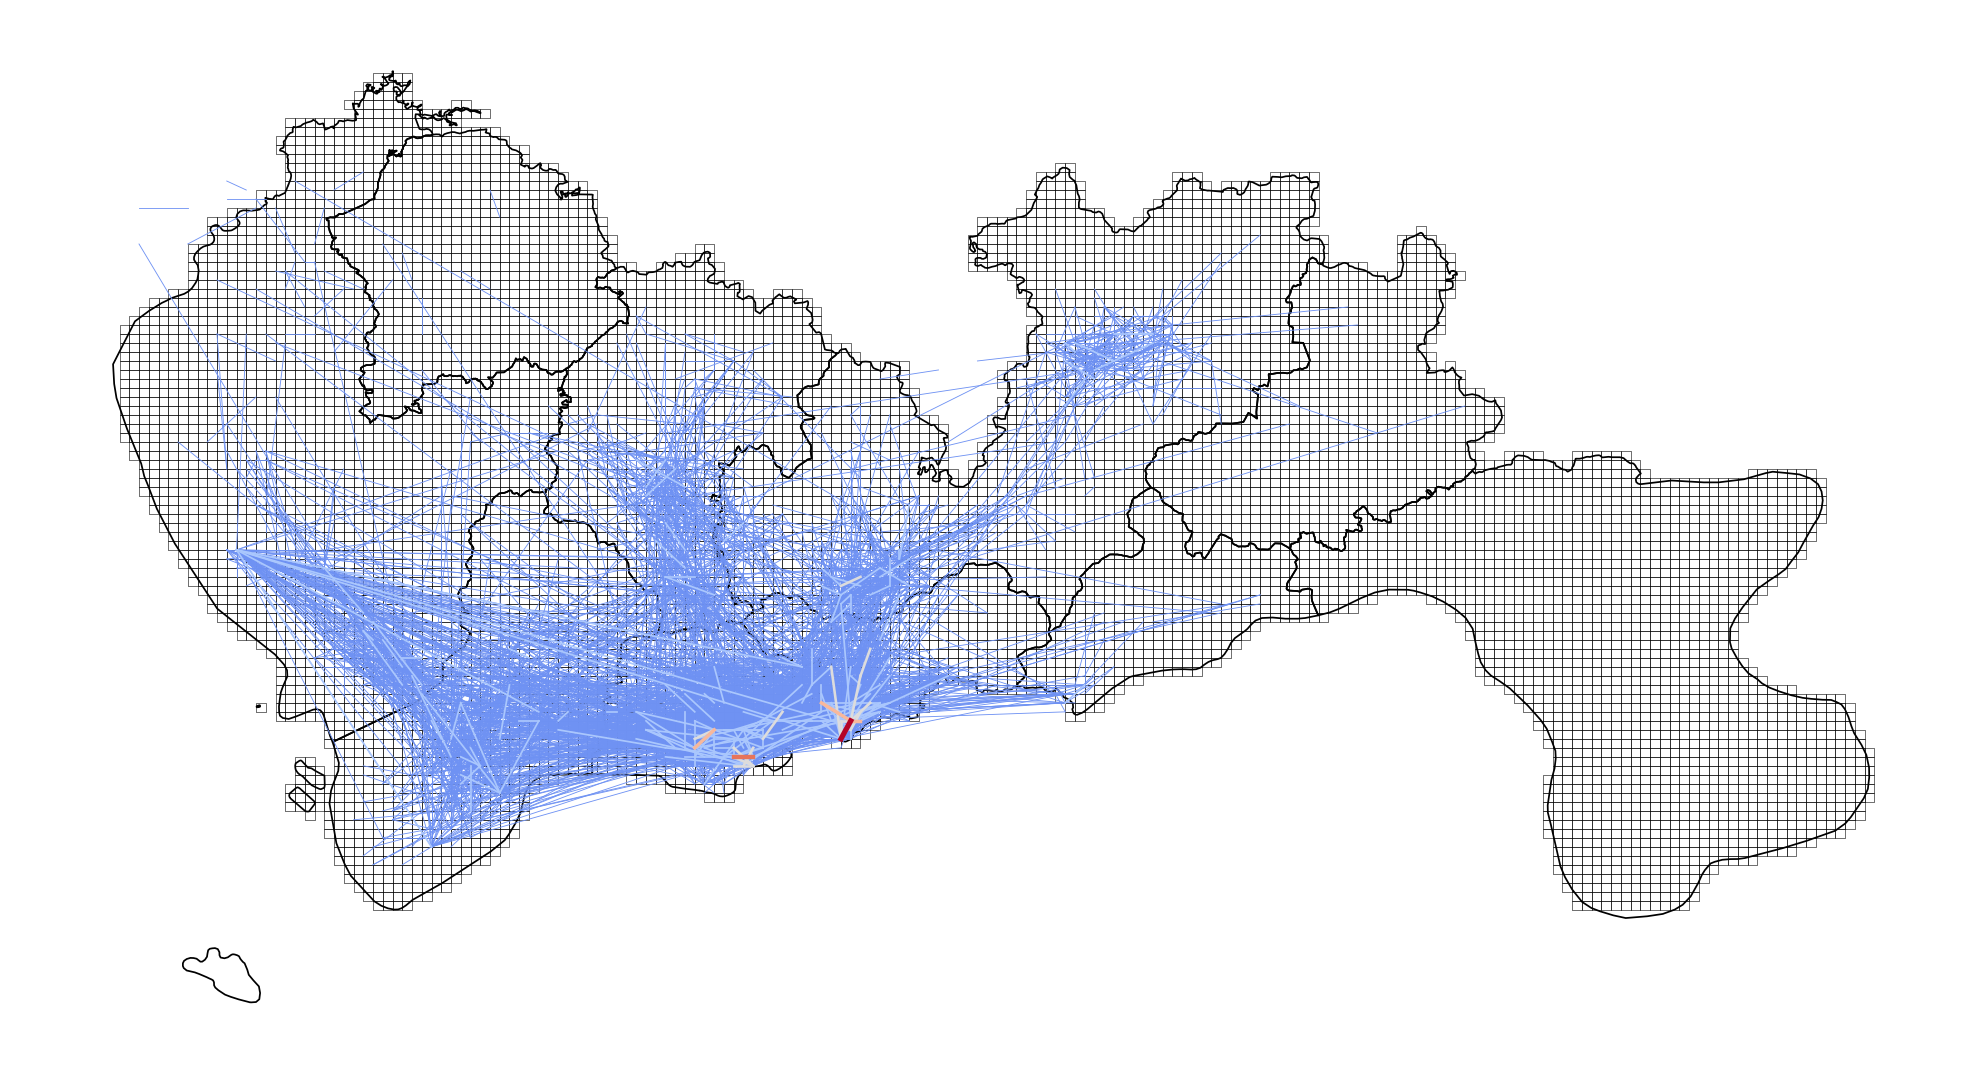

In [39]:
#绘制OD  
import matplotlib.pyplot as plt  
fig = plt.figure(1,(10,8),dpi = 250)        
ax  = plt.subplot(111)    
plt.sca(ax)    
  
#绘制地图底图，设置两者均在ax上绘制  
grid_sz.plot(ax =ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)    
sz.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5) 
  
#设置colormap的数据  
import matplotlib  
vmax = OD['count'].max()  
#设定一个标准化的工具，设定OD的colormap最大最小值，他的作用是norm(count)就会将count标准化到0-1的范围内  
norm = matplotlib.colors.Normalize(vmin=0,vmax=vmax)  
#设定colormap的颜色  
cmapname = 'coolwarm'  
#cmap是一个获取颜色的工具，cmap(a)会返回颜色，其中a是0-1之间的值  
cmap = matplotlib.colormaps.get_cmap(cmapname)  
  
#遍历绘制OD  
for i in range(len(OD)):  
    r = OD.iloc[i]  
    count = r['count']  
    linewidth = 1.5*(count/OD['count'].max())  
    plt.plot([r['SHBLON'],r['EHBLON']],[r['SHBLAT'],r['EHBLAT']],linewidth = linewidth,color = cmap(norm(count)))  
      
#隐藏坐标轴  
plt.axis('off')    
plt.show()  

<Axes: >

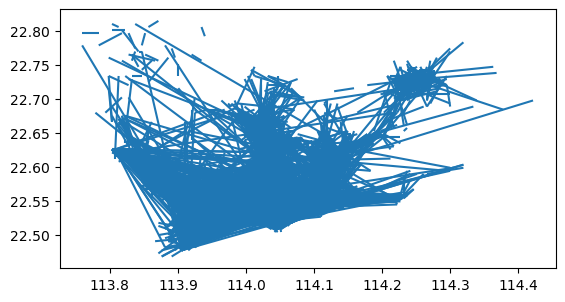

In [40]:
from shapely.geometry import LineString    
#遍历生成OD的LineString对象，并赋值给geometry列  
OD['geometry'] = OD.apply(lambda r:LineString([[r['SHBLON'],r['SHBLAT']],[r['EHBLON'],r['EHBLAT']]]),axis = 1)    
#转换为GeoDataFrame  
OD = gpd.GeoDataFrame(OD)    
#绘制看看是否能够识别图形信息  
OD.plot()  

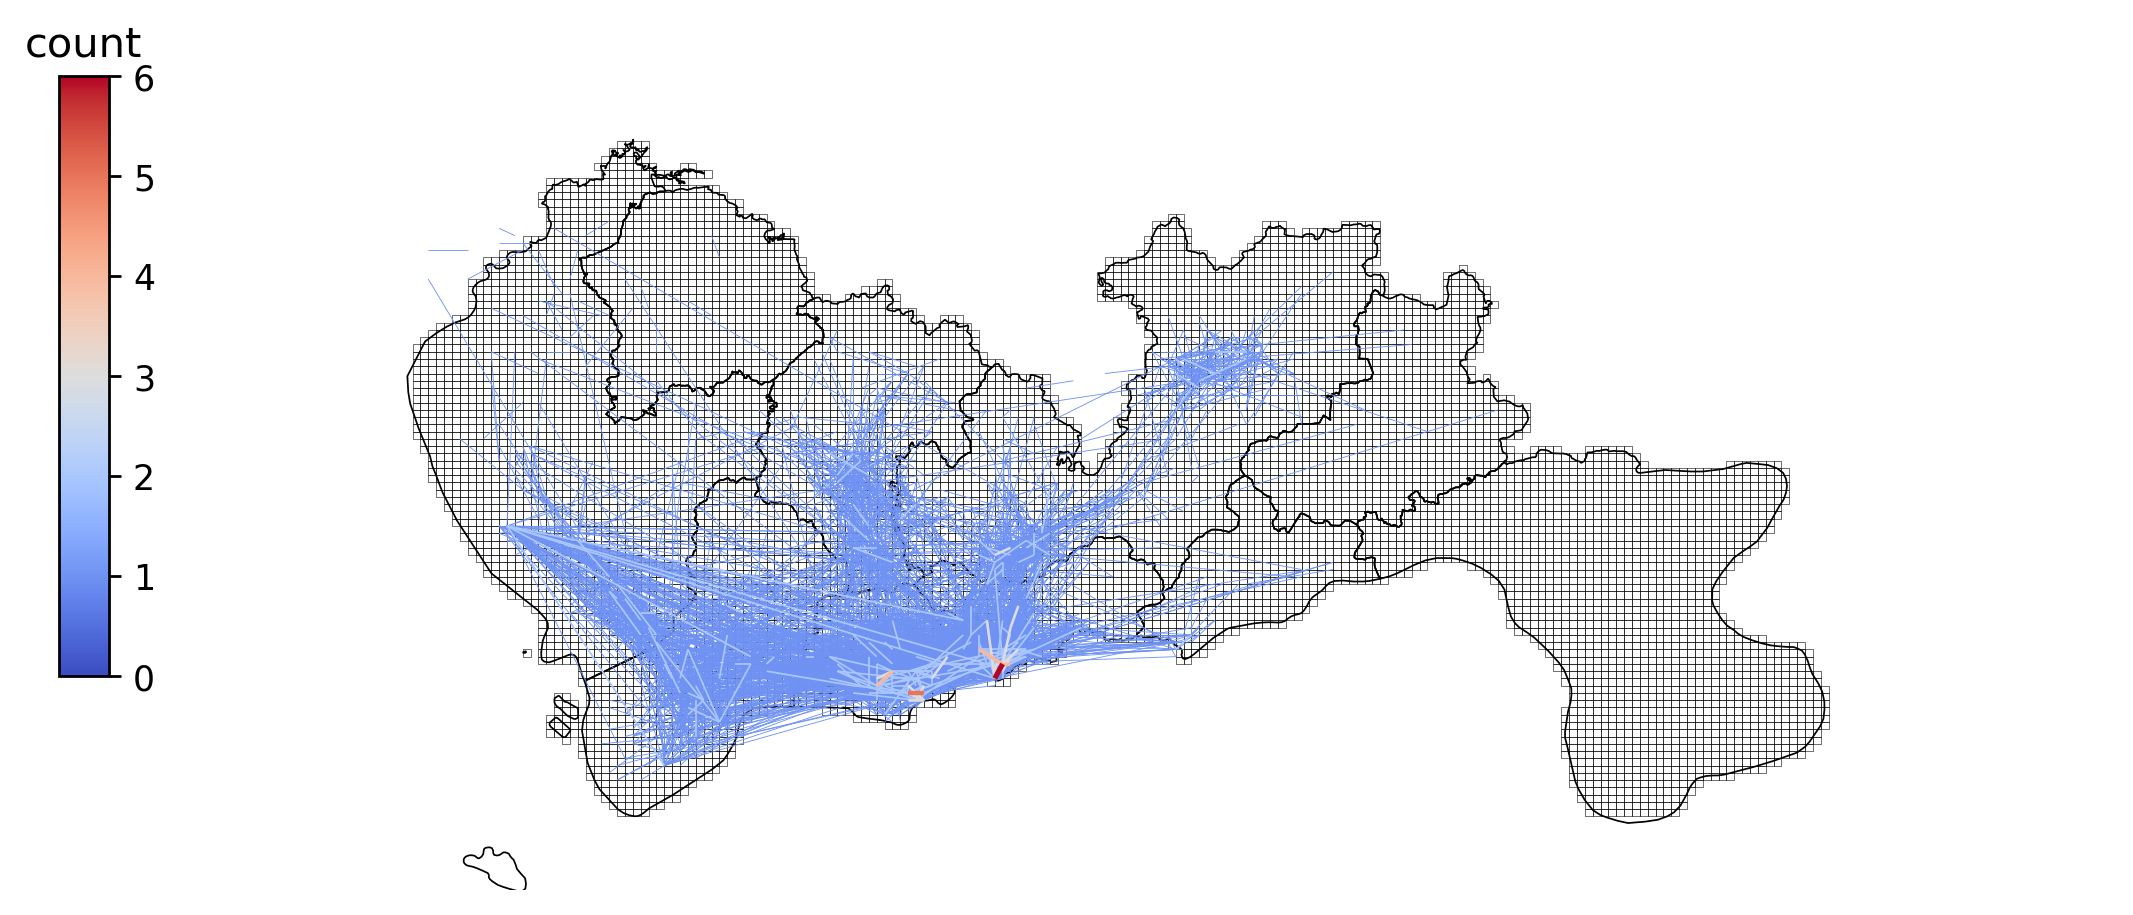

In [41]:
#绘制  
#创建图框  
import matplotlib.pyplot as plt  
fig = plt.figure(1,(10,8),dpi = 250)      
ax = plt.subplot(111)  
#绘制栅格与行政区划边界  
grid_sz.plot(ax = ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)  
sz.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5) 
#设置colormap的数据  
import matplotlib as mpl  
vmax = OD['count'].max()  
cmapname = 'coolwarm'  
cmap = mpl.colormaps.get_cmap(cmapname)  
#创建colorbar的纸，命名为cax  
cax = plt.axes([0.08, 0.4, 0.02, 0.3])  
plt.title('count')  
plt.sca(ax)  
#绘制OD  
OD.plot(ax = ax,column = 'count',#指定在ax上绘制，并指定颜色映射的列  
        linewidth = 1.5*(OD['count']/OD['count'].max()),#指定线宽  
        cmap = cmap,vmin = 0,vmax = vmax, #设置OD的颜色  
        legend=True,cax = cax) #设置绘制色标  
#隐藏边框，并设定显示范围  
plt.axis('off')  
plt.xlim(113.6,114.8)  
plt.ylim(22.4,22.9)  
#显示图  
plt.show()  

In [42]:
warnings.filterwarnings("ignore", "Geometry is in a geographic CRS")
warnings.filterwarnings("ignore", "CRS mismatch between the CRS of left geometries and the CRS of right geometries")


#读取行政区划的矢量图形
sz = gpd.GeoDataFrame.from_file(r'data/sz/sz.shp',encoding = 'utf8')
# sz.crs = "epsg:4326"
#读取栅格数据  
grid_sz = gpd.GeoDataFrame.from_file('data/grid_sz.json') 
# grid_sz.crs = "epsg:4326"


#提取栅格中心点，创建一个新变量  
grid_centroid = grid_sz.copy()  

#提取栅格中心点，赋值给grid_centriod的geometry  
# grid_centroid.geometry = grid_centroid.centroid.to_crs(crs=4326) 
grid_centroid['geometry'] = grid_centroid.centroid
#栅格匹配到行政区划：gpd.sjoin  
grid_centroid = gpd.sjoin(grid_centroid,sz)  
grid_centroid   

,LONCOL,LATCOL,HBLON,HBLAT,geometry,index_right,centroid_x,centroid_y,qh
2,0,54,113.751940,22.690654,POINT (113.75194 22.69065),3,113.851387,22.679120,宝安
3,0,55,113.751940,22.695150,POINT (113.75194 22.69515),3,113.851387,22.679120,宝安
4,0,56,113.751940,22.699647,POINT (113.75194 22.69965),3,113.851387,22.679120,宝安
5,0,57,113.751940,22.704143,POINT (113.75194 22.70414),3,113.851387,22.679120,宝安
6,0,58,113.751940,22.708640,POINT (113.75194 22.70864),3,113.851387,22.679120,宝安
...,...,...,...,...,...,...,...,...,...
8976,178,14,114.619265,22.510789,POINT (114.61927 22.51079),8,114.502205,22.571337,大鹏
8977,178,15,114.619265,22.515286,POINT (114.61927 22.51529),8,114.502205,22.571337,大鹏
8978,178,16,114.619265,22.519783,POINT (114.61927 22.51978),8,114.502205,22.571337,大鹏
8979,178,17,114.619265,22.524279,POINT (114.61927 22.52428),8,114.502205,22.571337,大鹏


In [43]:
#保留有用的字段  
grid_centroid = grid_centroid[['LONCOL','LATCOL','qh']]  
grid_centroid

,LONCOL,LATCOL,qh
2,0,54,宝安
3,0,55,宝安
4,0,56,宝安
5,0,57,宝安
6,0,58,宝安
...,...,...,...
8976,178,14,大鹏
8977,178,15,大鹏
8978,178,16,大鹏
8979,178,17,大鹏


In [44]:
#改变grid_centroid字段名，使其与OD数据起点栅格编号列能够匹配 
grid_centroid.columns = ['SLONCOL','SLATCOL','Sqh']  
OD = pd.merge(OD,grid_centroid,on = ['SLONCOL','SLATCOL'] ) 

#改变grid_centroid字段名，使其与OD数据终点栅格编号列能够匹配 
grid_centroid.columns = ['ELONCOL','ELATCOL','Eqh']  
OD = pd.merge(OD,grid_centroid,on = ['ELONCOL','ELATCOL'] )

In [45]:
 #集计OD量  
qhod  = OD.groupby(['Sqh','Eqh'])['count'].sum().reset_index()  
#去除起终点在同个行政区划的数据  
qhod = qhod[qhod['Sqh'] != qhod['Eqh']] 
qhod.head(5)

,Sqh,Eqh,count
2,南山,宝安,78
3,南山,福田,125
4,南山,罗湖,17
5,南山,龙华,14
6,南山,龙岗,9


In [46]:
#匹配起点行政区划的中心点经纬度  
tmp = sz[['centroid_x','centroid_y','qh']]  
tmp.columns = ['S_x','S_y','Sqh']  
qhod = pd.merge(qhod,tmp,on = 'Sqh')  
#匹配终点行政区划的中心点经纬度  
tmp.columns = ['E_x','E_y','Eqh']  
qhod = pd.merge(qhod,tmp,on = 'Eqh')  

<Axes: >

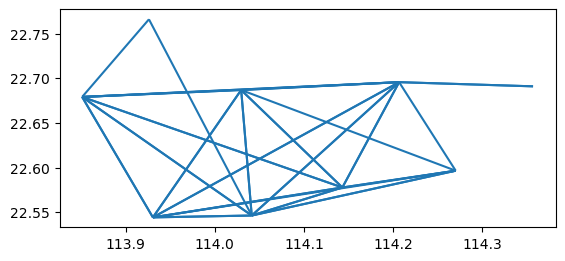

In [47]:
warnings.filterwarnings("ignore", "You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column")
#为 OD期望线生成GeoDataFrame

qhod = gpd.GeoDataFrame(qhod)  
# LineString的构造采用线性序列，一般采用2个或者多个(x,y[,z])点元组。
# 构造的LineString对象代表点与点之间的一个或多个直线样条。
qhod['geometry'] = qhod.apply(lambda r:LineString([ [r['S_x'],r['S_y']], [r['E_x'],r['E_y']] ]),axis = 1)  

# qhod.set_geometry(qhod.apply(lambda r:LineString([[r['S_x'],r['S_y']],[r['E_x'],r['E_y']]]),axis = 1))  

qhod.plot()

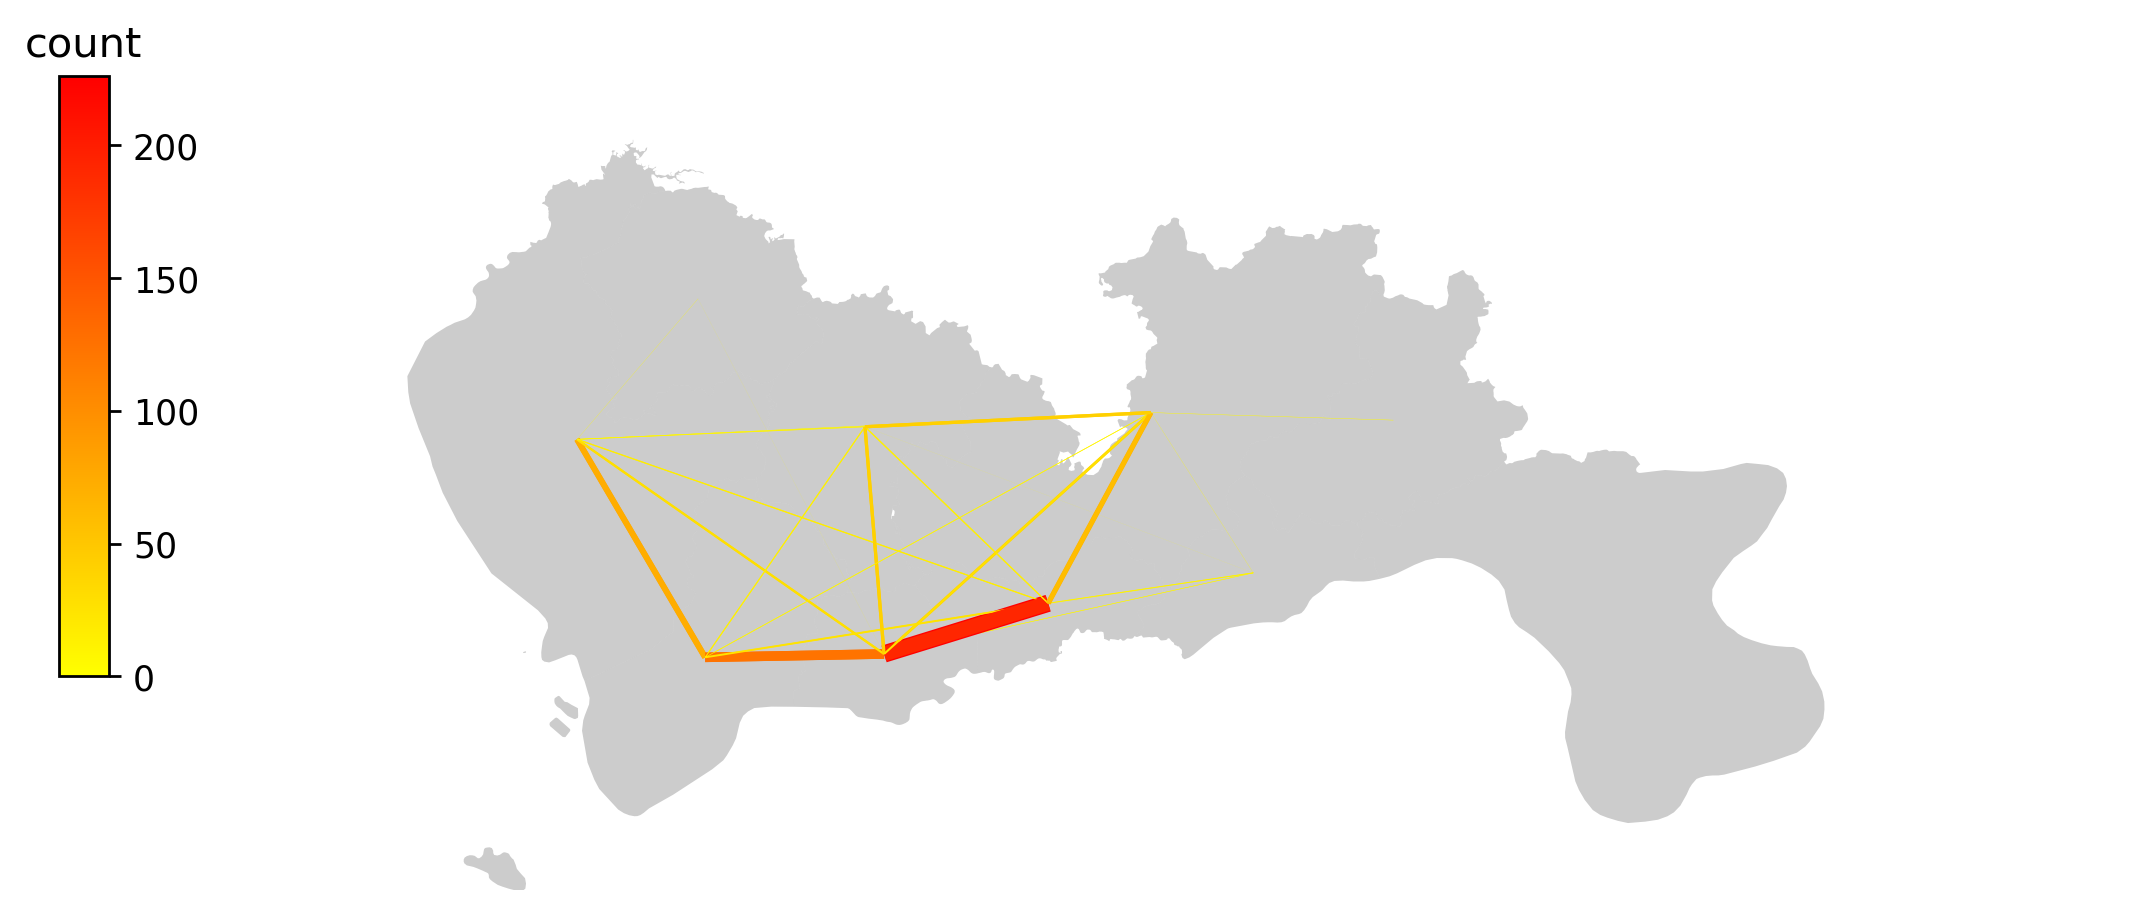

In [48]:
#绘制
#创建图框  
import matplotlib.pyplot as plt  
fig = plt.figure(1,(10,8),dpi = 250)      
ax = plt.subplot(111)  
#绘制行政区划边界  
sz.plot(ax = ax,edgecolor = (0,0,0,0),facecolor = (0,0,0,0.2),linewidths=0.5)
#设置colormap的数据  
import matplotlib as mpl  
vmax = qhod['count'].max()  
cmapname = 'autumn_r'  
cmap = mpl.colormaps.get_cmap(cmapname)  
#创建colorbar
cax = plt.axes([0.08, 0.4, 0.02, 0.3])  
plt.title('count')  
plt.sca(ax)  
#绘制OD  
qhod.plot(ax = ax,column = 'count',#指定在ax上绘制，并指定颜色映射的列  
        linewidth = 5*(qhod['count']/qhod['count'].max()),#指定线宽  
        cmap = cmap,vmin = 0,vmax = vmax, #设置OD的颜色  
        legend=True,cax = cax) #设置绘制色标  
#隐藏边框，并设定显示范围  
plt.axis('off')  
plt.xlim(113.6,114.8)  
plt.ylim(22.4,22.9)  
#显示图  
plt.show()  